In [4]:
import numpy as np
import cv2
import pandas as pd
import os
import csv
from skimage.filters import roberts ,sobel,scharr,prewitt
from scipy import ndimage as nd
import glob
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [23]:
def feature_extraction(img):
    w,h=img.shape
    df=pd.DataFrame()
    img2=img.reshape(-1)
#     df["original_image"]=img2
    num=1 #to count numbers up in order to give gabor feature a label in data frame 
    kernels=[]
    z=[]
    for theta in range(2):
        theta=theat=theta/4.*np.pi
        for sigma in (1,3):
            for lamda in np.arange(0,np.pi,np.pi/4):
                for gamma in (.05,.5):
                    gabor_label="gabor"+str(num) #label gabor colums AS GABOR1 ,GABOR2,GABOR3
                    ksize=3
                    kernel=cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,0,ktype=cv2.CV_32F)
                    kernels.append(kernel)
                    fimg=cv2.filter2D(img2,cv2.CV_8UC3,kernel)
                    z.append(fimg.reshape(w,h))
                    filtered_img=fimg.reshape(-1)
                    df[gabor_label]=filtered_img
                    
#                     print(gabor_label,": theta=",theta,": sigma=",sigma,":lamda=",lamda,":gamma=",gamma)
                    num+=1
                    
#     canny                
#     edges=cv2.Canny(img,70,150)
#     edges1=edges.reshape(-1)
#     df["Canny edge"]=edges1    
    
#     edge_roberts=roberts(img)
#     edge_robert1=edge_roberts.reshape(-1)
#     df["roberts"]=edge_robert1
     
#     edge_scharr=scharr(img)
#     edge_scharr1=edge_scharr.reshape(-1)
#     df["scharr"]=edge_scharr1
    
#     edge_prewitt=prewitt(img)
#     edge_prewitt=edge_prewitt.reshape(-1)
#     df["prewitt"]=edge_prewitt
    
#     edge_sobel=sobel(img)
#     edge_sobel1=edge_sobel.reshape(-1)
#     df["sobel"]=edge_sobel1
    
#     median_img2=nd.median_filter(img,size=5)
#     median_img3=median_img2.reshape(-1)
#     df["median 5"]=median_img3
    
#     median_img=nd.median_filter(img,size=3)
#     median_img1=median_img.reshape(-1)
#     df["median 3"]=median_img1
    
#     gaussian_img4=nd.gaussian_filter(img,sigma=7)
#     gaussian_img5=gaussian_img4.reshape(-1)
#     df["gaussian_s7"]=gaussian_img5
    
#     gaussian_img2=nd.gaussian_filter(img,sigma=5)
#     gaussian_img3=gaussian_img2.reshape(-1)
#     df["gaussian_s5"]=gaussian_img3

#     gaussian_img=nd.gaussian_filter(img,sigma=3)
#     gaussian_img1=gaussian_img.reshape(-1)
#     df["gaussian_s3"]=gaussian_img1
    
#     variance_img=nd.generic_filter(img,np.var,size=3)
#     variance_img1=variance_img.reshape(-1)
#     df["variance s3"]=variance_img1
    
    return df,z

    
    
    

In [24]:
train_image_fullpath=r"D:\UNet_dataset\temp_120\Triples_Raw-Subtracted-Splat\Aggregate\In_focus\Station15_001160_00001_splat.tif"

In [25]:
train_img1 = load_img(train_image_fullpath)
train_img1=img_to_array(train_img1)
train_img=cv2.cvtColor(train_img1, cv2.COLOR_BGR2GRAY)
train_img=np.uint8(train_img)
X,z=feature_extraction(train_img)

In [19]:
X

,gabor1,gabor2,gabor3,gabor4,gabor5,gabor6,gabor7,gabor8,gabor9,gabor10,...,gabor23,gabor24,gabor25,gabor26,gabor27,gabor28,gabor29,gabor30,gabor31,gabor32
0,0,0,95,89,24,22,0,0,0,0,...,56,43,0,0,255,255,17,16,17,15
1,0,0,95,88,24,22,0,0,0,0,...,55,40,0,0,255,255,35,34,12,10
2,0,0,103,94,26,24,0,0,0,0,...,59,42,0,0,255,255,42,41,12,10
3,0,0,116,108,29,27,0,0,0,0,...,68,52,0,0,255,255,22,21,20,18
4,0,0,127,117,32,29,0,0,0,0,...,74,54,0,0,255,255,39,37,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576605,0,0,134,123,34,31,0,0,0,0,...,78,57,0,0,255,255,45,43,18,15
576606,0,0,147,136,37,34,0,0,0,0,...,86,64,0,0,255,255,41,39,22,19
576607,0,0,159,147,40,37,0,0,0,0,...,92,68,0,0,255,255,47,45,23,20
576608,0,0,161,149,41,37,0,0,0,0,...,94,69,0,0,255,255,48,46,23,20


In [79]:
from sklearn.cluster import KMeans

In [80]:
km=KMeans(n_clusters=3,init="k-means++",random_state=5)
y_means=km.fit(X)

In [81]:
y_means

KMeans(n_clusters=3, random_state=5)

In [82]:
y_means.cluster_centers_

array([[  0.        ,   0.        , 136.27700343, 125.72253146,
         34.2747177 ,  31.62183754,   0.        ,   0.        ,
          0.        ,   0.        , 120.01311496, 118.93569368,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 254.74363279, 250.55020395,
         34.57167338,  20.2794757 ,  79.30922997,  58.38599463,
          0.        ,   0.        , 255.        , 255.        ,
         41.06483361,  39.46672636,  19.31486345,  16.7692807 ],
       [  0.        ,   0.        , 226.7148924 , 214.41604674,
         59.99800485,  55.36746473,   0.        ,   0.        ,
          0.        ,   0.        , 206.70686903, 205.17206784,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 255.        , 255.        ,
         59.8916631 ,  35.02659256, 138.88345447, 102.40477412,
          0.        ,   0.        , 255.        , 255.        ,
         70.86504204,  68.10530141,  34

In [83]:
# plt.scatter(X[:,1],X[:,2],c=y_means,s=50,cmap="viridis")
centers=y_means.cluster_centers_
label=y_means.labels_
       

In [84]:
label

array([2, 2, 2, ..., 0, 0, 0])

In [85]:
label[0]

2

In [119]:
center=[[0,0,0],[0,128,0],[0,0,0]]

In [120]:
res=[]
for i in range(len(label)):
    res.append(center[label[i]])

In [121]:
res

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0,

In [122]:
res=np.array(res)
res

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [123]:
res.shape

(576610, 3)

In [124]:
res.shape

(576610, 3)

In [125]:
res=np.uint8(res)

In [126]:
train_img1.shape

(545, 1058, 3)

In [127]:
res=res.reshape((train_img1.shape))

In [128]:
res.shape

(545, 1058, 3)

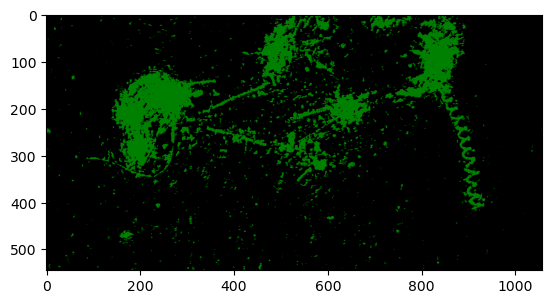

In [129]:
plt.imshow(res)
plt.show()

In [130]:
!pip install GaborNet

In [131]:
from GaborNet import GaborConv2d

In [26]:
z

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 95,  95, 103, ..., 112, 107, 108],
        [101,  89,  95, ..., 125, 120, 108],
        [ 91,  70,  83, ..., 135, 122, 109],
        ...,
        [121,  94, 103, ..., 141, 144, 137],
        [128, 111, 124, ..., 149, 159, 145],
        [131, 130, 125, ..., 159, 161, 162]], dtype=uint8),
 array([[ 89,  88,  94, ..., 103,  98, 100],
        [ 94,  82,  87, ..., 115, 111, 100],
        [ 84,  64,  75, ..., 124, 112, 100],
        ...,
        [111,  87,  94, ..., 129, 133, 127],
        [118, 103, 114, ..., 137, 147, 135],
        [120

In [27]:
z=np.array(z)

In [28]:
z.shape

(32, 545, 1058)

In [29]:
z[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

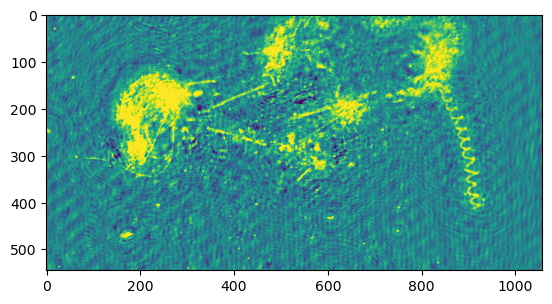

In [35]:
plt.imshow(z[3])
plt.show()

In [38]:
X

,gabor1,gabor2,gabor3,gabor4,gabor5,gabor6,gabor7,gabor8,gabor9,gabor10,...,gabor23,gabor24,gabor25,gabor26,gabor27,gabor28,gabor29,gabor30,gabor31,gabor32
0,0,0,95,89,24,22,0,0,0,0,...,56,43,0,0,255,255,17,16,17,15
1,0,0,95,88,24,22,0,0,0,0,...,55,40,0,0,255,255,35,34,12,10
2,0,0,103,94,26,24,0,0,0,0,...,59,42,0,0,255,255,42,41,12,10
3,0,0,116,108,29,27,0,0,0,0,...,68,52,0,0,255,255,22,21,20,18
4,0,0,127,117,32,29,0,0,0,0,...,74,54,0,0,255,255,39,37,18,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576605,0,0,134,123,34,31,0,0,0,0,...,78,57,0,0,255,255,45,43,18,15
576606,0,0,147,136,37,34,0,0,0,0,...,86,64,0,0,255,255,41,39,22,19
576607,0,0,159,147,40,37,0,0,0,0,...,92,68,0,0,255,255,47,45,23,20
576608,0,0,161,149,41,37,0,0,0,0,...,94,69,0,0,255,255,48,46,23,20


In [41]:
X[0:1:]

,gabor1,gabor2,gabor3,gabor4,gabor5,gabor6,gabor7,gabor8,gabor9,gabor10,...,gabor23,gabor24,gabor25,gabor26,gabor27,gabor28,gabor29,gabor30,gabor31,gabor32
0,0,0,95,89,24,22,0,0,0,0,...,56,43,0,0,255,255,17,16,17,15


In [42]:
y=X.to_numpy()

In [44]:
y.shape

(576610, 32)

In [47]:
z=y.reshape(545, 1058,32)

In [48]:
z.shape

(545, 1058, 32)

In [53]:
p=z[::1]

In [55]:
p[0]

array([[  0,   0,  95, ...,  16,  17,  15],
       [  0,   0,  95, ...,  34,  12,  10],
       [  0,   0, 103, ...,  41,  12,  10],
       ...,
       [  0,   0, 112, ...,  33,  16,  14],
       [  0,   0, 107, ...,  37,  14,  12],
       [  0,   0, 108, ...,  29,  16,  14]], dtype=uint8)

ValueError: slice step cannot be zero